**Risk Factor Prediction for Chronic kidney dieseas**

---


Article:- https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9874070/

---

J Pathol Inform. 2023; 14: 100189.

Published online 2023 Jan 12. doi: 10.1016/j.jpi.2023.100189

---

Article:- Risk Factor Prediction of Chronic Kidney Disease based on Machine Learning Algorithms
https://ieeexplore.ieee.org/document/9315878

---

Authors:-
Md. Ashiqul Islam; Shamima Akter; Md. Sagar Hossen
Published in: 2020 3rd International Conference on Intelligent Sustainable Systems (ICISS)

Date of Conference: 03-05 December 2020

Date Added to IEEE Xplore: 18 January 2021

ISBN Information:
DOI: 10.1109/ICISS49785.2020.9315878

Publisher: IEEE

Conference Location: Thoothukudi, India

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.special as sps
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings("ignore")

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# Data load & visualization

In [ ]:
#Load data file
data_orig = pd.read_csv('/content/drive/MyDrive/BCSEProject/Final Project/ckd-dataset-v2.csv')

In [ ]:
data_orig.head()

,bp (Diastolic),bp limit,sg,al,class,rbc,su,pc,pcc,ba,bgr,bu,sod,sc,pot,hemo,pcv,rbcc,wbcc,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
0,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,class,meta
2,0,0,1.019 - 1.021,1 - 1,ckd,0,< 0,0,0,0,< 112,< 48.1,138 - 143,< 3.65,< 7.31,11.3 - 12.6,33.5 - 37.4,4.46 - 5.05,7360 - 9740,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
3,0,0,1.009 - 1.011,< 0,ckd,0,< 0,0,0,0,112 - 154,< 48.1,133 - 138,< 3.65,< 7.31,11.3 - 12.6,33.5 - 37.4,4.46 - 5.05,12120 - 14500,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
4,0,0,1.009 - 1.011,≥ 4,ckd,1,< 0,1,0,1,< 112,48.1 - 86.2,133 - 138,< 3.65,< 7.31,8.7 - 10,29.6 - 33.5,4.46 - 5.05,14500 - 16880,0,0,0,1,0,0,127.281 - 152.446,s1,1,< 12


In [ ]:
data = data_orig.drop([0, 1]).copy()

In [ ]:
data.head()

,bp (Diastolic),bp limit,sg,al,class,rbc,su,pc,pcc,ba,bgr,bu,sod,sc,pot,hemo,pcv,rbcc,wbcc,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
2,0,0,1.019 - 1.021,1 - 1,ckd,0,< 0,0,0,0,< 112,< 48.1,138 - 143,< 3.65,< 7.31,11.3 - 12.6,33.5 - 37.4,4.46 - 5.05,7360 - 9740,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
3,0,0,1.009 - 1.011,< 0,ckd,0,< 0,0,0,0,112 - 154,< 48.1,133 - 138,< 3.65,< 7.31,11.3 - 12.6,33.5 - 37.4,4.46 - 5.05,12120 - 14500,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
4,0,0,1.009 - 1.011,≥ 4,ckd,1,< 0,1,0,1,< 112,48.1 - 86.2,133 - 138,< 3.65,< 7.31,8.7 - 10,29.6 - 33.5,4.46 - 5.05,14500 - 16880,0,0,0,1,0,0,127.281 - 152.446,s1,1,< 12
5,1,1,1.009 - 1.011,3 - 3,ckd,0,< 0,0,0,0,112 - 154,< 48.1,133 - 138,< 3.65,< 7.31,13.9 - 15.2,41.3 - 45.2,4.46 - 5.05,7360 - 9740,0,0,0,0,0,0,127.281 - 152.446,s1,1,< 12
6,0,0,1.015 - 1.017,< 0,ckd,0,< 0,0,0,0,154 - 196,< 48.1,133 - 138,< 3.65,< 7.31,13.9 - 15.2,37.4 - 41.3,5.05 - 5.64,7360 - 9740,0,1,0,1,1,0,127.281 - 152.446,s1,1,12 - 20


In [ ]:
data.describe()

,bp (Diastolic),bp limit,sg,al,class,rbc,su,pc,pcc,ba,bgr,bu,sod,sc,pot,hemo,pcv,rbcc,wbcc,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
count,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200
unique,2,3,5,5,2,2,6,2,2,2,10,8,9,7,4,10,10,9,9,2,2,2,2,2,2,11,5,2,10
top,1,0,1.019 - 1.021,< 0,ckd,0,< 0,0,0,0,112 - 154,< 48.1,133 - 138,< 3.65,< 7.31,11.3 - 12.6,37.4 - 41.3,4.46 - 5.05,7360 - 9740,0,0,0,0,0,0,< 26.6175,s1,1,59 - 66
freq,108,95,75,116,128,175,170,155,173,189,79,108,92,159,197,49,56,96,98,122,130,178,160,165,168,68,54,128,48


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 2 to 201
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   bp (Diastolic)  200 non-null    object
 1   bp limit        200 non-null    object
 2   sg              200 non-null    object
 3   al              200 non-null    object
 4   class           200 non-null    object
 5   rbc             200 non-null    object
 6   su              200 non-null    object
 7   pc              200 non-null    object
 8   pcc             200 non-null    object
 9   ba              200 non-null    object
 10  bgr             200 non-null    object
 11  bu              200 non-null    object
 12  sod             200 non-null    object
 13  sc              200 non-null    object
 14  pot             200 non-null    object
 15  hemo            200 non-null    object
 16  pcv             200 non-null    object
 17  rbcc            200 non-null    object
 18  wbcc      

In [1]:
#Target
plt.figure(figsize=(3,3))
sns.countplot(data=data,x='affected')
plt.show()

NameError: name 'plt' is not defined

In [ ]:
data.columns

Index(['bp (Diastolic)', 'bp limit', 'sg', 'al', 'class', 'rbc', 'su', 'pc',
       'pcc', 'ba', 'bgr', 'bu', 'sod', 'sc', 'pot', 'hemo', 'pcv', 'rbcc',
       'wbcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'grf', 'stage',
       'affected', 'age'],
      dtype='object')

In [ ]:
# We select the quantitative and categorical variables to apply some transformation.
num_var = []
cat_var = ['bp (Diastolic)', 'bp limit', 'sg', 'al', 'rbc', 'su', 'pc',
           'pcc', 'ba', 'bgr', 'bu', 'sod', 'sc', 'pot', 'hemo', 'pcv', 'rbcc',
           'wbcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'grf', 'stage', 'age']
cols = cat_var + num_var

# Model

In [ ]:
#Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

from sklearn.model_selection import train_test_split

#Predictores & target
X = data.drop({'affected', 'class'}, axis=1)
y = np.where(data['affected']=='0', 0, 1)
seed = 0

# Preprocessing for numerical data
numerical_transformer = StandardScaler()

# Preprocessing for categorical data
categorical_transformer = OneHotEncoder(sparse_output = False, handle_unknown = "ignore")

# We create a preprocessor that performs the transformations.
preprocessor = ColumnTransformer(transformers = [("ohe", categorical_transformer, cat_var),  ("scaler", numerical_transformer, num_var)],  remainder = "passthrough",  verbose_feature_names_out = False).set_output(transform = "pandas")
X = preprocessor.fit_transform(X)

# oversample = SMOTE()
# X, y = oversample.fit_resample(X, y)


In [ ]:
!pip install scikit-learn
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import recall_score
import numpy as np

In [ ]:

from sklearn.model_selection import KFold
kf = KFold(n_splits=10)

def get_score(model, X_train, X_test, y_train, y_test):

    # # Preprocessing of training data
    # my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),('model', model)])
    my_pipeline = Pipeline(steps=[('model', model)])

    # Fit model

    my_pipeline.fit(X_train, y_train)

    y_pred_train = my_pipeline.predict(X_train)
    y_pred_test = my_pipeline.predict(X_test)

    n=len(y_pred_test)

    y_pred1 = np.zeros(n)

    for i in range(1, n):
        if y_pred_test[i] > 0.33174:
            y_pred1[i] = int(1)
        else:
            y_pred1[i] = int(0)

    #model.fit(X_train, y_train)
    f1 = f1_score(y_test, y_pred1, average='weighted')
    accuracy = accuracy_score(y_test, y_pred1)
    precision = precision_score(y_test, y_pred1, average='weighted')
    recall = recall_score(y_test, y_pred1, average='binary')
    return f1, accuracy, precision , y_pred_train , y_pred_test , recall

In [ ]:
from sklearn.model_selection import StratifiedKFold


F1_scores_logistic = []
Accuracy_logistic = []
Precision_logistic = []
Recall_logistic = []

Max_f1_logistic = 0
logistic_y_Test = []
logistic_y_train = []
logistic_y_pred_train = []
logistic_y_pred_test = []

F1_scores_rf = []
Accuracy_rf = []
Precision_rf = []
Recall_rf = []

Max_f1_rf = 0
rf_y_Test = []
rf_y_train = []
rf_y_pred_train = []
rf_y_pred_test = []

F1_scores_svm = []
Accuracy_svm = []
Precision_svm = []
Recall_svm = []

Max_f1_svm = 0
svm_y_Test = []
svm_y_train = []
svm_y_pred_train = []
svm_y_pred_test = []

F1_scores_dt = []
Accuracy_dt = []
Precision_dt = []
Recall_dt = []

Max_f1_dt = 0
dt_y_Test = []
dt_y_train = []
dt_y_pred_train = []
dt_y_pred_test = []

F1_scores_knn = []
Accuracy_knn = []
Precision_knn = []
Recall_knn = []

Max_f1_knn = 0
knn_y_Test = []
knn_y_train = []
knn_y_pred_train = []
knn_y_pred_test = []

In [ ]:
X = X.reset_index(drop=True)
y = pd.DataFrame(y)
y = y.reset_index(drop=True)
folds = StratifiedKFold(n_splits=3)

for train_index, test_index in folds.split(X,y):

    X_train, X_test, y_train, y_test = X.loc[train_index], X.loc[test_index], y.loc[train_index], y.loc[test_index]

    f1_logistic, accuracy_logistic, precision_logistic, train, test, recall_logistic = get_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X_train, X_test, y_train, y_test)
    F1_scores_logistic.append(f1_logistic)
    Accuracy_logistic.append(accuracy_logistic)
    Precision_logistic.append(precision_logistic)
    Recall_logistic.append(recall_logistic)

    if(f1_logistic!=1.0 and Max_f1_logistic<f1_logistic):
        MAX_f1_logistic = f1_logistic
        logistic_y_Test = y_test.copy()
        logistic_y_train = y_train.copy()
        logistic_y_pred_train = train.copy()
        logistic_y_pred_test = test.copy()

    f1_rf, accuracy_rf, precision_rf, train, test, recall_rf = get_score(RandomForestRegressor(random_state = seed), X_train, X_test, y_train, y_test)
    F1_scores_rf.append(f1_rf)
    Accuracy_rf.append(accuracy_rf)
    Precision_rf.append(precision_rf)
    Recall_rf.append(recall_rf)

    if(f1_rf!=1.0 and Max_f1_rf<f1_rf):
        MAX_f1_rf = f1_rf
        rf_y_Test = y_test.copy()
        rf_y_train = y_train.copy()
        rf_y_pred_train = train.copy()
        rf_y_pred_test = test.copy()

    f1_svm, accuracy_svm, precision_svm, train, test, recall_svm = get_score(SVC(gamma='auto'), X_train, X_test, y_train, y_test)
    F1_scores_svm.append(f1_svm)
    Accuracy_svm.append(accuracy_svm)
    Precision_svm.append(precision_svm)
    Recall_svm.append(recall_svm)

    if(f1_svm!=1.0 and Max_f1_svm<f1_svm):
        MAX_f1_svm = f1_svm
        svm_y_Test = y_test.copy()
        svm_y_train = y_train.copy()
        svm_y_pred_train = train.copy()
        svm_y_pred_test = test.copy()

    f1_dt, accuracy_dt, precision_dt, train, test, recall_dt = get_score(DecisionTreeRegressor(), X_train, X_test, y_train, y_test)
    F1_scores_dt.append(f1_dt)
    Accuracy_dt.append(accuracy_dt)
    Precision_dt.append(precision_dt)
    Recall_dt.append(recall_dt)

    if(f1_dt!=1.0 and Max_f1_dt<f1_dt):
        MAX_f1_dt = f1_dt
        dt_y_Test = y_test.copy()
        dt_y_train = y_train.copy()
        dt_y_pred_train = train.copy()
        dt_y_pred_test = test.copy()

    f1_knn, accuracy_knn, precision_knn, train, test, recall_knn = get_score(KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2), X_train, X_test, y_train, y_test)
    F1_scores_knn.append(f1_knn)
    Accuracy_knn.append(accuracy_knn)
    Precision_knn.append(precision_knn)
    Recall_knn.append(recall_knn)

    if(f1_knn!=1.0 and Max_f1_knn<f1_knn):
        MAX_f1_knn = f1_knn
        knn_y_Test = y_test.copy()
        knn_y_train = y_train.copy()
        knn_y_pred_train = train.copy()
        knn_y_pred_test = test.copy()

In [ ]:
import statistics

#LOGISTICS REGRESSION
F1_scores_logistic = F1_scores_logistic[:-1]
Accuracy_logistic = Accuracy_logistic[:-1]
Precision_logistic = Precision_logistic[:-1]
Recall_logistic = Recall_logistic[:-1]

Best_Accuracy_logistic = max(Accuracy_logistic)
Best_f1_logistic = max(F1_scores_logistic)
Best_Precision_logistic = max(Precision_logistic)
Best_Recall_logistic = max(Recall_logistic)

Average_Accuracy_logistic = np.mean(Accuracy_logistic)
Average_f1_logistic = np.mean(F1_scores_logistic)
Average_Precision_logistic = np.mean(Precision_logistic)
Average_Recall_logistic = np.mean(Recall_logistic)

Std_Accuracy_logistic = statistics.stdev(Accuracy_logistic)
Std_f1_logistic = statistics.stdev(F1_scores_logistic)
Std_Precision_logistic = statistics.stdev(Precision_logistic)
Std_Recall_logistic = statistics.stdev(Recall_logistic)

print("\n Logistics regression :- \n","Best Accuracy:- ",Best_Accuracy_logistic,"||  Average Accuracy:- ",Average_Accuracy_logistic,"||  Accuracy Standard Deviation:- ",Std_Accuracy_logistic)
print("\n","Best F1 Score:- ",Best_f1_logistic,"||  Average F1 Score:- ",Average_f1_logistic,"||  F1 Score Standard Deviation:- ",Std_f1_logistic)
print("\n","Best Precision:- ",Best_Precision_logistic,"||  Average Precision:- ",Average_Precision_logistic,"|| Precision Standard Deviation:- ",Std_Precision_logistic)
print("\n","Best Recall:- ",Best_Recall_logistic,"||  Average Recall:- ",Average_Recall_logistic,"|| Recall Standard Deviation:- ",Std_Recall_logistic)

#RANDOM FOREST
F1_scores_rf = F1_scores_rf[:-1]
Accuracy_rf = Accuracy_rf[:-1]
Precision_rf = Precision_rf[:-1]
Recall_rf = Recall_rf[:-1]

Best_Accuracy_rf = max(Accuracy_rf)
Best_f1_rf = max(F1_scores_rf)
Best_Precision_rf = max(Precision_rf)
Best_Recall_rf = max(Recall_rf)

Average_Accuracy_rf = np.mean(Accuracy_rf)
Average_f1_rf = np.mean(F1_scores_rf)
Average_Precision_rf = np.mean(Precision_rf)
Average_Recall_rf = np.mean(Recall_rf)

Std_Accuracy_rf = statistics.stdev(Accuracy_rf)
Std_f1_rf = statistics.stdev(F1_scores_rf)
Std_Precision_rf = statistics.stdev(Precision_rf)
Std_Recall_rf = statistics.stdev(Recall_rf)

print("\n Random Forest :- \n","Best Accuracy:- ",Best_Accuracy_rf,"||  Average Accuracy:- ",Average_Accuracy_rf,"||  Accuracy Standard Deviation:- ",Std_Accuracy_rf)
print("\n","Best F1 Score:- ",Best_f1_rf,"||  Average F1 Score:- ",Average_f1_rf,"||  F1 Score Standard Deviation:- ",Std_f1_rf)
print("\n","Best Precision:- ",Best_Precision_rf,"||  Average Precision:- ",Average_Precision_rf,"|| Precision Standard Deviation:- ",Std_Precision_rf)
print("\n","Best Recall:- ",Best_Recall_rf,"||  Average Recall:- ",Average_Recall_rf,"|| Recall Standard Deviation:- ",Std_Recall_rf)

#SUPPORT VECTOR MACHINE
F1_scores_svm = F1_scores_svm[:-1]
Accuracy_svm = Accuracy_svm[:-1]
Precision_svm = Precision_svm[:-1]
Recall_svm = Recall_svm[:-1]

Best_Accuracy_svm = max(Accuracy_svm)
Best_f1_svm = max(F1_scores_svm)
Best_Precision_svm = max(Precision_svm)
Best_Recall_svm = max(Recall_svm)

Average_Accuracy_svm = np.mean(Accuracy_svm)
Average_f1_svm = np.mean(F1_scores_svm)
Average_Precision_svm = np.mean(Precision_svm)
Average_Recall_svm = np.mean(Recall_svm)

Std_Accuracy_svm = statistics.stdev(Accuracy_svm)
Std_f1_svm = statistics.stdev(F1_scores_svm)
Std_Precision_svm = statistics.stdev(Precision_svm)
Std_Recall_svm = statistics.stdev(Recall_svm)

print("\n Support Vector machine :- \n","Best Accuracy:- ",Best_Accuracy_svm,"||  Average Accuracy:- ",Average_Accuracy_svm,"||  Accuracy Standard Deviation:- ",Std_Accuracy_svm)
print("\n","Best F1 Score:- ",Best_f1_svm,"||  Average F1 Score:- ",Average_f1_svm,"||  F1 Score Standard Deviation:- ",Std_f1_svm)
print("\n","Best Precision:- ",Best_Precision_svm,"||  Average Precision:- ",Average_Precision_svm,"|| Precision Standard Deviation:- ",Std_Precision_svm)
print("\n","Best Recall:- ",Best_Recall_svm,"||  Average Recall:- ",Average_Recall_svm,"|| Recall Standard Deviation:- ",Std_Recall_svm)

#Decision TREE
F1_scores_dt = F1_scores_dt[:-1]
Accuracy_dt = Accuracy_dt[:-1]
Precision_dt = Precision_dt[:-1]
Recall_dt = Recall_dt[:-1]

Best_Accuracy_dt = max(Accuracy_dt)
Best_f1_dt = max(F1_scores_dt)
Best_Precision_dt = max(Precision_dt)
Best_Recall_dt = max(Recall_dt)

Average_Accuracy_dt = np.mean(Accuracy_dt)
Average_f1_dt = np.mean(F1_scores_dt)
Average_Precision_dt = np.mean(Precision_dt)
Average_Recall_dt = np.mean(Recall_dt)

Std_Accuracy_dt = statistics.stdev(Accuracy_dt)
Std_f1_dt = statistics.stdev(F1_scores_dt)
Std_Precision_dt = statistics.stdev(Precision_dt)
Std_Recall_dt = statistics.stdev(Recall_dt)

print("\n Decision Tree :- \n","Best Accuracy:- ",Best_Accuracy_dt,"||  Average Accuracy:- ",Average_Accuracy_dt,"||  Accuracy Standard Deviation:- ",Std_Accuracy_dt)
print("\n","Best F1 Score:- ",Best_f1_dt,"||  Average F1 Score:- ",Average_f1_dt,"||  F1 Score Standard Deviation:- ",Std_f1_dt)
print("\n","Best Precision:- ",Best_Precision_dt,"||  Average Precision:- ",Average_Precision_dt,"|| Precision Standard Deviation:- ",Std_Precision_dt)
print("\n","Best Recall:- ",Best_Recall_dt,"||  Average Recall:- ",Average_Recall_dt,"|| Recall Standard Deviation:- ",Std_Recall_dt)

#KNN
F1_scores_knn = F1_scores_knn[:-1]
Accuracy_knn = Accuracy_knn[:-1]
Precision_knn = Precision_knn[:-1]
Recall_knn = Recall_knn[:-1]

Best_Accuracy_knn = max(Accuracy_knn)
Best_f1_knn = max(F1_scores_knn)
Best_Precision_knn = max(Precision_knn)
Best_Recall_knn = max(Recall_knn)

Average_Accuracy_knn = np.mean(Accuracy_knn)
Average_f1_knn = np.mean(F1_scores_knn)
Average_Precision_knn = np.mean(Precision_knn)
Average_Recall_knn = np.mean(Recall_knn)

Std_Accuracy_knn = statistics.stdev(Accuracy_knn)
Std_f1_knn = statistics.stdev(F1_scores_knn)
Std_Precision_knn = statistics.stdev(Precision_knn)
Std_Recall_knn = statistics.stdev(Recall_knn)

print("\n K-Nearest Neighbour :- \n","Best Accuracy:- ",Best_Accuracy_knn,"||  Average Accuracy:- ",Average_Accuracy_knn,"||  Accuracy Standard Deviation:- ",Std_Accuracy_knn)
print("\n","Best F1 Score:- ",Best_f1_knn,"||  Average F1 Score:- ",Average_f1_knn,"||  F1 Score Standard Deviation:- ",Std_f1_knn)
print("\n","Best Precision:- ",Best_Precision_knn,"||  Average Precision:- ",Average_Precision_knn,"|| Precision Standard Deviation:- ",Std_Precision_knn)
print("\n","Best Recall:- ",Best_Recall_knn,"||  Average Recall:- ",Average_Recall_knn,"|| Recall Standard Deviation:- ",Std_Recall_knn)


 Logistics regression :- 
 Best Accuracy:-  0.9701492537313433 ||  Average Accuracy:-  0.9477611940298507 ||  Accuracy Standard Deviation:-  0.03166149766506931

 Best F1 Score:-  0.9701492537313433 ||  Average F1 Score:-  0.9483696124548467 ||  F1 Score Standard Deviation:-  0.03080106407684231

 Best Precision:-  0.9701492537313433 ||  Average Precision:-  0.9541945445187854 || Precision Standard Deviation:-  0.022563366152118385

 Best Recall:-  0.9767441860465116 ||  Average Recall:-  0.9302325581395349 || Recall Standard Deviation:-  0.0657773749940974

 Random Forest :- 
 Best Accuracy:-  0.9850746268656716 ||  Average Accuracy:-  0.9701492537313432 ||  Accuracy Standard Deviation:-  0.021107665110046178

 Best F1 Score:-  0.9850016243069319 ||  Average F1 Score:-  0.9700032486138639 ||  F1 Score Standard Deviation:-  0.021210906318703815

 Best Precision:-  0.9854138398914519 ||  Average Precision:-  0.9703336086366587 || Precision Standard Deviation:-  0.02132666756425124

 Be

**RANDOM** **FOREST**



In [ ]:
from sklearn.metrics import confusion_matrix


def mat(train,test,pred_train,pred_test):
  y_pred_train = np.array(pred_train)
  y_pred_test = np.array(pred_test)
  confusion_matrix_train = confusion_matrix(train, np.where(y_pred_train>0.33174, 1, 0))
  confusion_matrix_test = confusion_matrix(test, np.where(y_pred_test>0.33174, 1, 0))

  fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 3.8))
  ax = ax.flat
  sns.heatmap(confusion_matrix_train, cmap = "Blues", cbar = False, linewidths = 1.5, annot = True, fmt = ' ', square = True, ax = ax[0], )
  ax[0].set_xlabel("Predicted", fontsize = 12, fontweight = "bold", color = "black")
  ax[0].set_ylabel("True", fontsize = 12, fontweight = "bold", color = "black")
  ax[0].set_title("Confusion Matrix Train", fontsize = 14, fontweight = "bold", color = "black")

  sns.heatmap(confusion_matrix_test, cmap = "Reds", annot = True, fmt = ' ', cbar = False, linewidths = 1.5, square = True, ax = ax[1])
  ax[1].set_xlabel("Predicted", fontsize = 12, fontweight = "bold", color = "black")
  ax[1].set_ylabel("True", fontsize = 12, fontweight = "bold", color = "black")
  ax[1].set_title("Confusion Matrix Test", fontsize = 14, fontweight = "bold", color = "black")

  fig.tight_layout()
  fig.show()

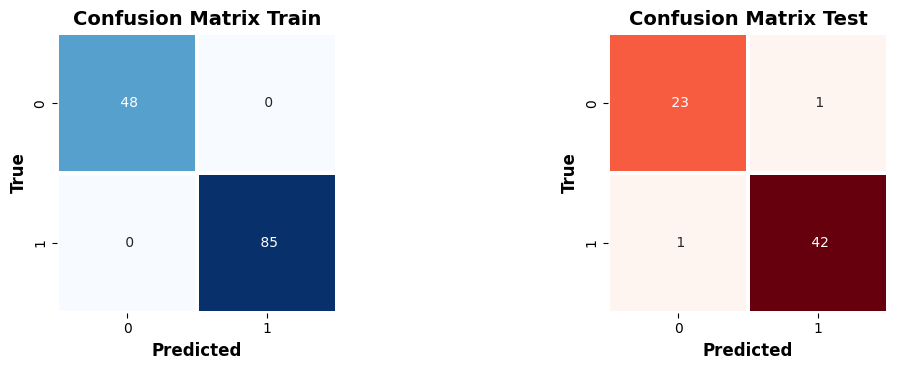

In [ ]:
mat(logistic_y_train,logistic_y_Test,logistic_y_pred_train,logistic_y_pred_test)

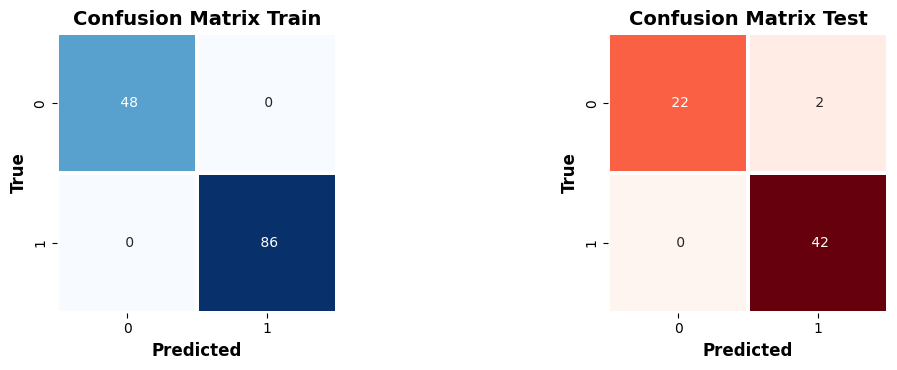

In [ ]:
mat(rf_y_train,rf_y_Test,rf_y_pred_train,rf_y_pred_test)

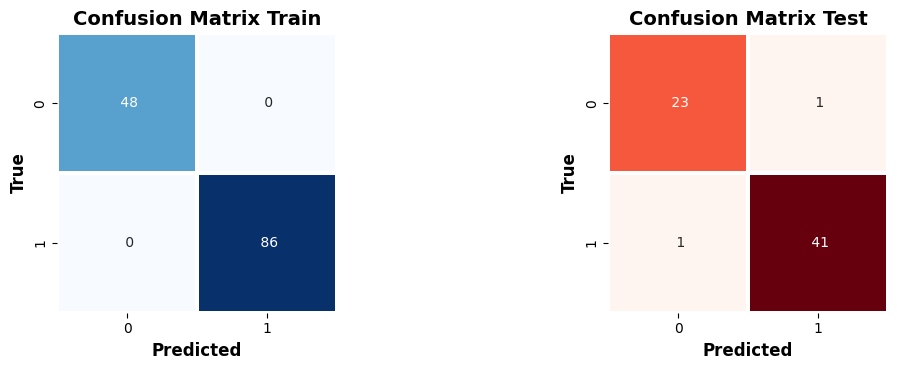

In [ ]:
mat(dt_y_train,dt_y_Test,dt_y_pred_train,dt_y_pred_test)

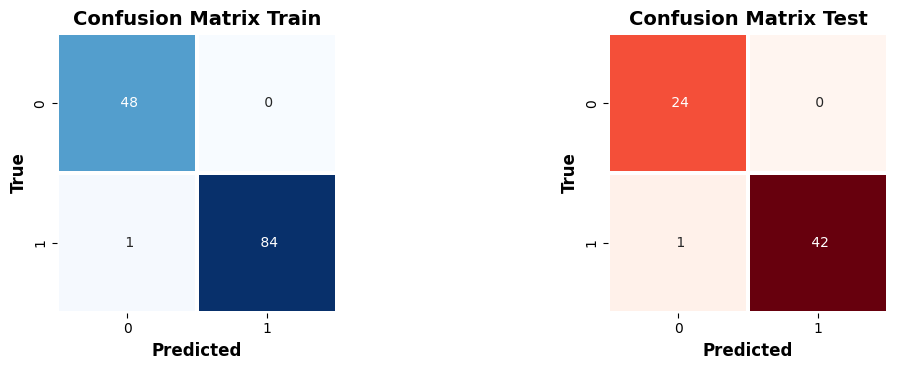

In [ ]:
mat(svm_y_train,svm_y_Test,svm_y_pred_train,svm_y_pred_test)

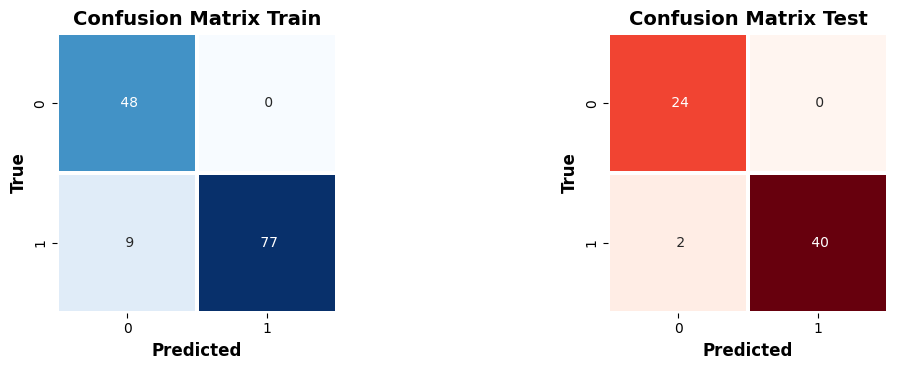

In [ ]:
mat(knn_y_train,knn_y_Test,knn_y_pred_train,knn_y_pred_test)